# Import and Clean the Data

In [1]:
import pandas as pd

In [2]:
toronto_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')

##### Take the first element in the downloaded data

In [3]:
toronto_df = toronto_data[0]

In [4]:
toronto_df.head()

,Postcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


##### Drop  records where Borough is not assigned

In [5]:
toronto_df_valid = toronto_df[toronto_df['Borough']!='Not assigned']

In [6]:
toronto_df_valid.head()

,Postcode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor


In [7]:
toronto_df_valid.shape

(210, 3)

##### For Postal Codes with more than one neighborhood, rollup into a single record where neighborhoods are comma separated

In [8]:
toronto_df_valid_new = toronto_df_valid.groupby(['Postcode','Borough'])['Neighborhood'].apply(list)
toronto_df_valid_new = toronto_df_valid_new.sample(frac=1).reset_index()
toronto_df_valid_new['Neighborhood']= toronto_df_valid_new['Neighborhood'].str.join(', ')

In [9]:
toronto_df_valid_new.head()

,Postcode,Borough,Neighborhood
0,M6L,North York,"Downsview, North Park, Upwood Park"
1,M5M,North York,"Bedford Park, Lawrence Manor East"
2,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel"
3,M5N,Central Toronto,Roselawn
4,M5V,Downtown Toronto,"CN Tower, Bathurst Quay, Island airport, Harbo..."


In [10]:
toronto_df_valid_new.shape

(103, 3)

In [11]:
toronto_df_valid_new.head()

,Postcode,Borough,Neighborhood
0,M6L,North York,"Downsview, North Park, Upwood Park"
1,M5M,North York,"Bedford Park, Lawrence Manor East"
2,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel"
3,M5N,Central Toronto,Roselawn
4,M5V,Downtown Toronto,"CN Tower, Bathurst Quay, Island airport, Harbo..."


##### Now for records where Neighborhood is Not assigned, set the Neighborhood equal to the Borough

In [12]:
#print(toronto_df_valid_new[toronto_df_valid_new['Neighborhood'].str.contains("Not assigned")].loc)
toronto_df_valid_new.loc[toronto_df_valid_new['Neighborhood'].str.contains("Not assigned"),'Neighborhood'] = toronto_df_valid_new['Borough']

In [13]:
toronto_df_valid_new

,Postcode,Borough,Neighborhood
0,M6L,North York,"Downsview, North Park, Upwood Park"
1,M5M,North York,"Bedford Park, Lawrence Manor East"
2,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel"
3,M5N,Central Toronto,Roselawn
4,M5V,Downtown Toronto,"CN Tower, Bathurst Quay, Island airport, Harbo..."
5,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi..."
6,M9P,Etobicoke,Westmount
7,M4P,Central Toronto,Davisville North
8,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv..."
9,M5R,Central Toronto,"The Annex, North Midtown, Yorkville"


In [14]:
toronto_df_valid_new[toronto_df_valid_new['Neighborhood'].str.contains("Not assigned")]

,Postcode,Borough,Neighborhood


# -----Question 1, Shape of The Dataframe ---

In [15]:
toronto_df_valid_new.shape

(103, 3)

##### Now read in the Toronto Postal Codes with Longitude Latitude values

In [16]:
geo_df = pd.read_csv('http://cocl.us/Geospatial_data')

In [17]:
geo_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


##### Merge in the long lat data with the neighborhood data

In [18]:
toronto_df_valid_merged = toronto_df_valid_new.merge(geo_df,left_on='Postcode', right_on='Postal Code')

In [19]:
toronto_df_valid_merged.head()

,Postcode,Borough,Neighborhood,Postal Code,Latitude,Longitude
0,M6L,North York,"Downsview, North Park, Upwood Park",M6L,43.713756,-79.490074
1,M5M,North York,"Bedford Park, Lawrence Manor East",M5M,43.733283,-79.419750
2,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel",M5L,43.648198,-79.379817
3,M5N,Central Toronto,Roselawn,M5N,43.711695,-79.416936
4,M5V,Downtown Toronto,"CN Tower, Bathurst Quay, Island airport, Harbo...",M5V,43.628947,-79.394420


In [20]:
toronto_df_valid_merged.drop(columns='Postal Code', inplace=True)

# ----Question 2----  the merged dataframe

In [21]:
toronto_df_valid_merged.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M6L,North York,"Downsview, North Park, Upwood Park",43.713756,-79.490074
1,M5M,North York,"Bedford Park, Lawrence Manor East",43.733283,-79.419750
2,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817
3,M5N,Central Toronto,Roselawn,43.711695,-79.416936
4,M5V,Downtown Toronto,"CN Tower, Bathurst Quay, Island airport, Harbo...",43.628947,-79.394420


# Now Explore One Particular Neighborhood

In [22]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    altair-4.0.0               |             py_0         606 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be 

In [23]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [24]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_df_valid_merged['Latitude'], toronto_df_valid_merged['Longitude'], toronto_df_valid_merged['Borough'], toronto_df_valid_merged['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [25]:
# @hiddden_cell
CLIENT_ID = 'GCVAMHG4W0NBF5ZQZD2IN23ARVLK412HZJSURE4CBG3FEHDD' # your Foursquare ID
CLIENT_SECRET = 'CKAO1VXTIPX2V2ZSNHXDEGRL0IRWDURSS4TUI2UBOQ3G0LWV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GCVAMHG4W0NBF5ZQZD2IN23ARVLK412HZJSURE4CBG3FEHDD
CLIENT_SECRET:CKAO1VXTIPX2V2ZSNHXDEGRL0IRWDURSS4TUI2UBOQ3G0LWV


In [26]:
neighborhood_latitude = toronto_df_valid_merged.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_df_valid_merged.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto_df_valid_merged.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Downsview, North Park, Upwood Park are 43.713756200000006, -79.4900738.


In [27]:
# The code was removed by Watson Studio for sharing.

'https://api.foursquare.com/v2/venues/explore?&client_id=GCVAMHG4W0NBF5ZQZD2IN23ARVLK412HZJSURE4CBG3FEHDD&client_secret=CKAO1VXTIPX2V2ZSNHXDEGRL0IRWDURSS4TUI2UBOQ3G0LWV&v=20180605&ll=43.713756200000006,-79.4900738&radius=500&limit=100'

In [28]:
results = requests.get(url).json()
#results

In [29]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [30]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Rustic Bakery,Bakery,43.715414,-79.490300
1,Maple leaf park,Park,43.716188,-79.493531
2,Queen's GreenBelt Park,Trail,43.712355,-79.484754
3,Mika's Trim,Construction & Landscaping,43.714068,-79.496113


In [31]:
nearby_venues.shape

(4, 4)

## Now Let's Explore all Venues in a Borough

In [32]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [33]:
scarborough_data = toronto_df_valid_merged[toronto_df_valid_merged['Borough'] == 'Scarborough']
scarborough_data.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
17,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
23,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
26,M1W,Scarborough,L'Amoreaux West,43.799525,-79.318389
33,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848
60,M1P,Scarborough,"Dorset Park, Scarborough Town Centre, Wexford ...",43.757410,-79.273304


In [34]:
scarborough_venues = getNearbyVenues(names=scarborough_data['Neighborhood'],
                                   latitudes=scarborough_data['Latitude'],
                                   longitudes=scarborough_data['Longitude']
                                  )

Rouge, Malvern
Scarborough Village
L'Amoreaux West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt North, L'Amoreaux East, Milliken, Steeles East
East Birchmount Park, Ionview, Kennedy Park
Guildwood, Morningside, West Hill
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt
Woburn
Cedarbrae
Clairlea, Golden Mile, Oakridge
Highland Creek, Rouge Hill, Port Union
Cliffcrest, Cliffside, Scarborough Village West
Upper Rouge


In [35]:
scarborough_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
1,Scarborough Village,43.744734,-79.239476,McCowan Park,43.745089,-79.239336,Playground
2,Scarborough Village,43.744734,-79.239476,Justin Boobys Metrosexual Spa,43.745348,-79.234237,Spa
3,L'Amoreaux West,43.799525,-79.318389,Mr Congee Chinese Cuisine 龍粥記,43.798879,-79.318335,Chinese Restaurant
4,L'Amoreaux West,43.799525,-79.318389,Phoenix Restaurant 金鳳餐廳,43.798198,-79.318432,Chinese Restaurant


In [36]:
scarborough_venues.shape

(89, 7)

In [37]:
scarborough_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",2,2,2,2,2,2
"Birch Cliff, Cliffside West",4,4,4,4,4,4
Cedarbrae,8,8,8,8,8,8
"Clairlea, Golden Mile, Oakridge",10,10,10,10,10,10
"Clarks Corners, Sullivan, Tam O'Shanter",10,10,10,10,10,10
"Cliffcrest, Cliffside, Scarborough Village West",3,3,3,3,3,3
"Dorset Park, Scarborough Town Centre, Wexford Heights",6,6,6,6,6,6
"East Birchmount Park, Ionview, Kennedy Park",5,5,5,5,5,5


In [38]:
print('There are {} uniques categories.'.format(len(scarborough_venues['Venue Category'].unique())))

There are 54 uniques categories.


# Analyze Each Neighborhood

In [39]:
# one hot encoding
scarborough_onehot = pd.get_dummies(scarborough_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
scarborough_onehot['Neighborhood'] = scarborough_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [scarborough_onehot.columns[-1]] + list(scarborough_onehot.columns[:-1])
scarborough_onehot = scarborough_onehot[fixed_columns]

scarborough_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Athletics & Sports,Auto Garage,Bakery,Bank,Bar,Breakfast Spot,Bubble Tea Shop,Bus Line,Bus Station,Café,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,College Stadium,Department Store,Discount Store,Electronics Store,Fast Food Restaurant,Fried Chicken Joint,Gas Station,General Entertainment,Grocery Store,Gym,Hakka Restaurant,Indian Restaurant,Intersection,Italian Restaurant,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lounge,Medical Center,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Motel,Noodle House,Park,Pet Store,Pharmacy,Pizza Place,Playground,Rental Car Location,Sandwich Place,Shopping Mall,Skating Rink,Smoke Shop,Soccer Field,Spa,Supermarket,Thai Restaurant,Vietnamese Restaurant
0,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Scarborough Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Scarborough Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,L'Amoreaux West,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,L'Amoreaux West,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
scarborough_onehot.shape

(89, 55)

In [41]:
scarborough_grouped = scarborough_onehot.groupby('Neighborhood').mean().reset_index()
scarborough_grouped

,Neighborhood,Accessories Store,American Restaurant,Athletics & Sports,Auto Garage,Bakery,Bank,Bar,Breakfast Spot,Bubble Tea Shop,Bus Line,Bus Station,Café,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,College Stadium,Department Store,Discount Store,Electronics Store,Fast Food Restaurant,Fried Chicken Joint,Gas Station,General Entertainment,Grocery Store,Gym,Hakka Restaurant,Indian Restaurant,Intersection,Italian Restaurant,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lounge,Medical Center,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Motel,Noodle House,Park,Pet Store,Pharmacy,Pizza Place,Playground,Rental Car Location,Sandwich Place,Shopping Mall,Skating Rink,Smoke Shop,Soccer Field,Spa,Supermarket,Thai Restaurant,Vietnamese Restaurant
0,Agincourt,0.000,0.000000,0.000,0.000,0.000,0.000,0.0,0.250000,0.000000,0.0,0.0,0.00,0.000,0.000000,0.000000,0.00,0.0,0.0,0.000,0.000000,0.000,0.000,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.00,0.25,0.000000,0.25,0.000,0.0,0.000,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000,0.25,0.000,0.0,0.000,0.000000,0.000,0.000000
1,"Agincourt North, L'Amoreaux East, Milliken, St...",0.000,0.000000,0.000,0.000,0.000,0.000,0.0,0.000000,0.000000,0.0,0.0,0.00,0.000,0.000000,0.000000,0.00,0.0,0.0,0.000,0.000000,0.000,0.000,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.00,0.000,0.0,0.000,0.000,0.000000,0.0,0.5,0.000000,0.000000,0.000000,0.5,0.000,0.000000,0.000,0.00,0.000,0.0,0.000,0.000000,0.000,0.000000
2,"Birch Cliff, Cliffside West",0.000,0.000000,0.000,0.000,0.000,0.000,0.0,0.000000,0.000000,0.0,0.0,0.25,0.000,0.000000,0.000000,0.25,0.0,0.0,0.000,0.000000,0.000,0.000,0.25,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.00,0.000,0.0,0.000,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000,0.25,0.000,0.0,0.000,0.000000,0.000,0.000000
3,Cedarbrae,0.000,0.000000,0.125,0.000,0.125,0.125,0.0,0.000000,0.000000,0.0,0.0,0.00,0.125,0.000000,0.000000,0.00,0.0,0.0,0.000,0.000000,0.125,0.125,0.00,0.000000,0.000000,0.125,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.00,0.000,0.0,0.000,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000,0.00,0.000,0.0,0.000,0.000000,0.125,0.000000
4,"Clairlea, Golden Mile, Oakridge",0.000,0.000000,0.000,0.000,0.200,0.000,0.0,0.000000,0.000000,0.2,0.1,0.00,0.000,0.000000,0.000000,0.00,0.0,0.0,0.000,0.100000,0.000,0.000,0.00,0.000000,0.000000,0.000,0.000000,0.100000,0.0,0.00,0.00,0.000000,0.00,0.000,0.1,0.000,0.000,0.000000,0.0,0.1,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000,0.00,0.000,0.1,0.000,0.000000,0.000,0.000000
5,"Clarks Corners, Sullivan, Tam O'Shanter",0.000,0.000000,0.000,0.000,0.000,0.100,0.0,0.000000,0.000000,0.0,0.0,0.00,0.000,0.100000,0.000000,0.00,0.0,0.0,0.000,0.100000,0.100,0.000,0.00,0.000000,0.000000,0.000,0.000000,0.000000,0.1,0.00,0.00,0.000000,0.00,0.000,0.0,0.000,0.000,0.000000,0.1,0.0,0.000000,0.100000,0.200000,0.0,0.000,0.000000,0.000,0.00,0.000,0.0,0.000,0.000000,0.100,0.000000
6,"Cliffcrest, Cliffside, Scarborough Village West",0.000,0.333333,0.000,0.000,0.000,0.000,0.0,0.000000,0.000000,0.0,0.0,0.00,0.000,0.000000,0.000000,0.00,0.0,0.0,0.000,0.000000,0.000,0.000,0.00,0.000000,0.000000,0.000,0.000000,0.333333,0.0,0.00,0.00,0.000000,0.00,0.000,0.0,0.000,0.000,0.333333,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000,0.00,0.000,0.0,0.000,0.000000,0.000,0.000000
7,"Dorset Park, Scarborough Town Centre, Wexford ...",0.000,0.000000,0.000,0.000,0.000,0.000,0.0,0.000000,0.000000,0.0,0.0,0.00,0.000,0.166667,0.000000,0.00,0.0,0.0,0.000,0.000000,0.000,0.000,0.00,0.000000,0.000000,0.000,0.333333,0.000000,0.0,0.00,0.00,0.166667,0.00,0.000,0.0,0.000,0.000,0.000000,0.0,0.0,0.166667,0.000000,0.000000,0.0,0.000,0.000000,0.000,0.00,0.000,0.0,0.000,0.000000,0.000,0.166667
8,"East Birchmount Park, Ionview, Kennedy Park",0.000,0.000000,0.000,0.000,0.000,0.000,0.0,0.000000,0.000000,0.0,0.2,0.00,0.000,

In [42]:
num_top_venues = 5

for hood in scarborough_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = scarborough_grouped[scarborough_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0  Latin American Restaurant  0.25
1                     Lounge  0.25
2             Breakfast Spot  0.25
3               Skating Rink  0.25
4          Accessories Store  0.00


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
               venue  freq
0         Playground   0.5
1               Park   0.5
2  Accessories Store   0.0
3          Pet Store   0.0
4  Korean Restaurant   0.0


----Birch Cliff, Cliffside West----
                   venue  freq
0        College Stadium  0.25
1  General Entertainment  0.25
2           Skating Rink  0.25
3                   Café  0.25
4      Accessories Store  0.00


----Cedarbrae----
                 venue  freq
0   Athletics & Sports  0.12
1      Thai Restaurant  0.12
2               Bakery  0.12
3                 Bank  0.12
4  Fried Chicken Joint  0.12


----Clairlea, Golden Mile, Oakridge----
           venue  freq
0         Bakery   0.2
1       Bus Line   0.2
2   Intersecti

In [43]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [44]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = scarborough_grouped['Neighborhood']

for ind in np.arange(scarborough_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(scarborough_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Latin American Restaurant,Skating Rink,Lounge,Breakfast Spot,Vietnamese Restaurant,Chinese Restaurant,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant
1,"Agincourt North, L'Amoreaux East, Milliken, St...",Park,Playground,Caribbean Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant,Electronics Store,Discount Store
2,"Birch Cliff, Cliffside West",Café,General Entertainment,Skating Rink,College Stadium,Caribbean Restaurant,Grocery Store,Gas Station,Fried Chicken Joint,Fast Food Restaurant,Electronics Store
3,Cedarbrae,Caribbean Restaurant,Bank,Gas Station,Fried Chicken Joint,Thai Restaurant,Hakka Restaurant,Bakery,Athletics & Sports,Department Store,Gym
4,"Clairlea, Golden Mile, Oakridge",Bakery,Bus Line,Park,Intersection,Soccer Field,Fast Food Restaurant,Bus Station,Metro Station,Coffee Shop,General Entertainment


# Lets look at neighborhoods in Toronto belongonging to Boroughs with the most neighborhoods

In [142]:
toronto_data_full = toronto_df_valid_merged
toronto_data_full.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M6L,North York,"Downsview, North Park, Upwood Park",43.713756,-79.490074
1,M5M,North York,"Bedford Park, Lawrence Manor East",43.733283,-79.419750
2,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817
3,M5N,Central Toronto,Roselawn,43.711695,-79.416936
4,M5V,Downtown Toronto,"CN Tower, Bathurst Quay, Island airport, Harbo...",43.628947,-79.394420


In [143]:
toronto_data_full['Borough'].unique()

array(['North York', 'Downtown Toronto', 'Central Toronto', 'Etobicoke',
       'West Toronto', 'East York', 'Scarborough', 'East Toronto', 'York',
       'Mississauga', "Queen's Park"], dtype=object)

In [144]:
toronto_data_full['Borough'].value_counts()[0:5]

North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           11
Central Toronto      9
Name: Borough, dtype: int64

In [145]:
top_5_boroughs = list(toronto_data_full['Borough'].value_counts()[0:5].keys())

In [146]:
toronto_data_full = toronto_data_full[toronto_data_full['Borough'].isin(top_5_boroughs)]

In [147]:
toronto_data_full.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M6L,North York,"Downsview, North Park, Upwood Park",43.713756,-79.490074
1,M5M,North York,"Bedford Park, Lawrence Manor East",43.733283,-79.419750
2,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817
3,M5N,Central Toronto,Roselawn,43.711695,-79.416936
4,M5V,Downtown Toronto,"CN Tower, Bathurst Quay, Island airport, Harbo...",43.628947,-79.394420


In [148]:
toronto_data_full.shape

(80, 5)

In [149]:
toronto_full_venues = getNearbyVenues(names=toronto_data_full['Neighborhood'],
                                   latitudes=toronto_data_full['Latitude'],
                                   longitudes=toronto_data_full['Longitude'],
                                      radius=500#set the radius = 300m
                                  ) 

Downsview, North Park, Upwood Park
Bedford Park, Lawrence Manor East
Commerce Court, Victoria Hotel
Roselawn
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Westmount
Davisville North
Kingsview Village, Martin Grove Gardens, Richview Gardens, St. Phillips
The Annex, North Midtown, Yorkville
Bloordale Gardens, Eringate, Markland Wood, Old Burnhamthorpe
Church and Wellesley
Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown
Northwest
Rouge, Malvern
North Toronto West
Kingsway Park South West, Mimico NW, The Queensway West, Royal York South West, South of Bloor
Christie
Fairview, Henry Farm, Oriole
Scarborough Village
Queen's Park
L'Amoreaux West
Central Bay Street
Lawrence Park
Stn A PO Boxes 25 The Esplanade
Adelaide, King, Richmond
Rosedale
Downsview Central
Birch Cliff, Cliffside West
Alderwood, Long Bra

In [150]:
print('There are {} unique categories.'.format(len(toronto_full_venues['Venue Category'].unique())))

There are 246 unique categories.


In [151]:
toronto_full_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Downsview, North Park, Upwood Park",43.713756,-79.490074,Rustic Bakery,43.715414,-79.490300,Bakery
1,"Downsview, North Park, Upwood Park",43.713756,-79.490074,Maple leaf park,43.716188,-79.493531,Park
2,"Downsview, North Park, Upwood Park",43.713756,-79.490074,Queen's GreenBelt Park,43.712355,-79.484754,Trail
3,"Downsview, North Park, Upwood Park",43.713756,-79.490074,Mika's Trim,43.714068,-79.496113,Construction & Landscaping
4,"Bedford Park, Lawrence Manor East",43.733283,-79.419750,Aroma Espresso Bar,43.735975,-79.420391,Café


In [152]:
# one hot encoding
toronto_full_onehot = pd.get_dummies(toronto_full_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_full_onehot['Neighborhood'] = toronto_full_venues['Neighborhood'] 
#toronto_full_onehot.head()

# move neighborhood column to the first column
#fixed_columns = [toronto_full_onehot.columns[-1]] + list(toronto_full_onehot.columns[:-1])
fixed_columns = sorted(toronto_full_onehot.columns,
                    key=lambda x: x == 'Neighborhood',
                    reverse=True)

#print(fixed_columns)
toronto_full_onehot = toronto_full_onehot[fixed_columns]
toronto_full_onehot.head()

,Neighborhood,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Café,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Festival,Filipino Restaurant,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"Downsview, North Park, Upwood Park",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [153]:
toronto_full_grouped = toronto_full_onehot.groupby('Neighborhood').mean().reset_index()
toronto_full_grouped.head()

,Neighborhood,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Café,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Festival,Filipino Restaurant,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"Adelaide, King, Richmond",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.01,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.01,0.0,0.01,0.02,0.0,0.0,0.0,0.01,0.03,0.01,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080000,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.02,0.0,0.0,0.02,0.0,0.0,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.01,0.0,0

In [154]:
num_top_venues = 5

for hood in toronto_full_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_full_grouped[toronto_full_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
         venue  freq
0  Coffee Shop  0.08
1         Café  0.05
2          Bar  0.04
3   Steakhouse  0.04
4   Restaurant  0.03


----Agincourt----
                             venue  freq
0                           Lounge  0.25
1                   Breakfast Spot  0.25
2        Latin American Restaurant  0.25
3                     Skating Rink  0.25
4  Molecular Gastronomy Restaurant  0.00


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
                 venue  freq
0                 Park   0.5
1           Playground   0.5
2  Monument / Landmark   0.0
3    Martial Arts Dojo   0.0
4       Massage Studio   0.0


----Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown----
                  venue  freq
0         Grocery Store  0.25
1            Beer Store  0.12
2  Fast Food Restaurant  0.12
3              Pharmacy  0.12
4           Pizza Place  0.12


----Alderwood, Long Branch----
 

# ---Question 3 Cluster Neighborhoods---

In [155]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_full_grouped['Neighborhood']

for ind in np.arange(toronto_full_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_full_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Bar,Steakhouse,Asian Restaurant,Burger Joint,Sushi Restaurant,Thai Restaurant,Restaurant,Pizza Place
1,Agincourt,Lounge,Latin American Restaurant,Skating Rink,Breakfast Spot,Yoga Studio,Falafel Restaurant,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant
2,"Agincourt North, L'Amoreaux East, Milliken, St...",Playground,Park,Yoga Studio,Dessert Shop,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",Grocery Store,Beer Store,Sandwich Place,Fast Food Restaurant,Pharmacy,Pizza Place,Fried Chicken Joint,Diner,Discount Store,Dog Run
4,"Alderwood, Long Branch",Pizza Place,Pool,Skating Rink,Coffee Shop,Gym,Pharmacy,Pub,Sandwich Place,Yoga Studio,Dim Sum Restaurant
5,"Bathurst Manor, Downsview North, Wilson Heights",Coffee Shop,Sandwich Place,Deli / Bodega,Supermarket,Sushi Restaurant,Bank,Middle Eastern Restaurant,Fast Food Restaurant,Restaurant,Fried Chicken Joint
6,Bayview Village,Café,Japanese Restaurant,Chinese Restaurant,Bank,Diner,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant
7,"Bedford Park, Lawrence Manor East",Coffee Shop,Italian Restaurant,Fast Food Restaurant,Sandwich Place,Indian Restaurant,Women's Store,Grocery Store,Juice Bar,Sushi Restaurant,Comfort Food Restaurant
8,Berczy Park,Coffee Shop,Cocktail Bar,Beer Bar,Steakhouse,Bakery,Seafood Restaurant,Cheese Shop,Café,Farmers Market,Restaurant
9,"Birch Cliff, Cliffside West",College Stadium,General Entertainment,Skating Rink,Café,Comic Shop,Diner,Ethiopian Restaurant,Colombian Restaurant,Empanada Restaurant,Electronics Store


In [156]:
# set number of clusters
#kclusters = 5

toronto_full_grouped_clustering = toronto_full_grouped.drop('Neighborhood', 1)
toronto_full_grouped_clustering.head()

# run k-means clustering
#kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_full_grouped_clustering)

# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10] 

,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Café,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Festival,Filipino Restaurant,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.01,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.01,0.0,0.01,0.02,0.0,0.0,0.0,0.01,0.03,0.01,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080000,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.02,0.0,0.0,0.02,0.0,0.0,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.01,0.0,0.0,0.01,0.0,0.0,0.01,0.00,0.020000,0.01,

In [157]:
# find the best k (number of clusters) regarding the inertia_ score

Ks = 30 # number of ks we will test
inertias = np.zeros((Ks-1))
for n in range(1,Ks):
    
    # run k-means clustering
    kmeans = KMeans(n_clusters=n, random_state=0, n_init = 30).fit(toronto_full_grouped_clustering)
    inertias[n-1] = kmeans.inertia_

# display the inertia    
inertias

array([14.66517801, 13.26179214, 12.21651645, 11.24667381, 10.40912542,
        9.77029718,  9.3416508 ,  8.72664041,  8.28065354,  7.89857892,
        7.61773108,  7.44766189,  7.03741123,  6.8177333 ,  6.54615209,
        6.19062403,  6.00497074,  5.6737432 ,  5.54620082,  5.29397771,
        4.89998419,  4.73139958,  4.5759398 ,  4.21261902,  4.02645044,
        3.91424413,  3.65352222,  3.37375885,  3.24690726])

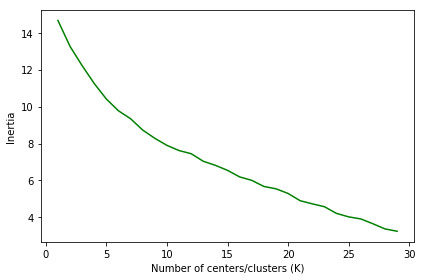

In [158]:
# 
# plot the inertia with the different k to find the better balance
#
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(range(1,Ks),inertias,'g')
plt.ylabel('Inertia ')
plt.xlabel('Number of centers/clusters (K)')
plt.tight_layout()
plt.show()

In [159]:
# set number of clusters
kclusters = 7

#toronto_full_grouped_clustering = toronto_full_grouped.drop('Neighborhood', 1)
#toronto_full_grouped_clustering.head()

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0,n_init = 12).fit(toronto_full_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 2, 5, 2, 2, 1, 1, 1, 1, 1], dtype=int32)

In [160]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_full_merged = toronto_data_full

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_full_merged = toronto_full_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_full_merged.head(10) # check the last columns!

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M6L,North York,"Downsview, North Park, Upwood Park",43.713756,-79.490074,2.0,Park,Trail,Bakery,Construction & Landscaping,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Dessert Shop,Donut Shop
1,M5M,North York,"Bedford Park, Lawrence Manor East",43.733283,-79.419750,1.0,Coffee Shop,Italian Restaurant,Fast Food Restaurant,Sandwich Place,Indian Restaurant,Women's Store,Grocery Store,Juice Bar,Sushi Restaurant,Comfort Food Restaurant
2,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817,1.0,Coffee Shop,Café,Hotel,Restaurant,Gastropub,American Restaurant,Steakhouse,Gym,Seafood Restaurant,Italian Restaurant
3,M5N,Central Toronto,Roselawn,43.711695,-79.416936,4.0,Garden,Yoga Studio,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop
4,M5V,Downtown Toronto,"CN Tower, Bathurst Quay, Island airport, Harbo...",43.628947,-79.394420,1.0,Airport Lounge,Airport Service,Airport Terminal,Sculpture Garden,Airport,Airport Food Court,Airport Gate,Bar,Boutique,Harbor / Marina
5,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049,1.0,Coffee Shop,Pub,Bagel Shop,Pizza Place,Liquor Store,Restaurant,Sports Bar,Supermarket,Sushi Restaurant,Fried Chicken Joint
6,M9P,Etobicoke,Westmount,43.696319,-79.532242,2.0,Pizza Place,Sandwich Place,Intersection,Middle Eastern Restaurant,Discount Store,Coffee Shop,Chinese Restaurant,Yoga Studio,Dog Run,Donut Shop
7,M4P,Central Toronto,Davisville North,43.712751,-79.390197,2.0,Park,Clothing Store,Dance Studio,Hotel,Sandwich Place,Food & Drink Shop,Convenience Store,Breakfast Spot,Gym,Dumpling Restaurant
8,M9R,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv...",43.688905,-79.554724,2.0,Park,Pizza Place,Sandwich Place,Mobile Phone Shop,Department Store,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop
9,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,1.0,Sandwich Place,Café,Coffee Shop,Pharmacy,Burger Joint,Flower Shop,Indian Restaurant,Pub,Middle Eastern Restaurant,BBQ Joint


In [161]:
toronto_full_merged.shape

(80, 16)

##### drop records that don't have any data

In [162]:
toronto_full_merged.dropna(axis=0, inplace=True)
toronto_full_merged.shape

(76, 16)

##### We will need to convert the clusters to integers for later analysis

In [163]:
toronto_full_merged= toronto_full_merged.astype({'Cluster Labels': 'int32'})

In [164]:
toronto_full_merged.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M6L,North York,"Downsview, North Park, Upwood Park",43.713756,-79.490074,2,Park,Trail,Bakery,Construction & Landscaping,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Dessert Shop,Donut Shop
1,M5M,North York,"Bedford Park, Lawrence Manor East",43.733283,-79.419750,1,Coffee Shop,Italian Restaurant,Fast Food Restaurant,Sandwich Place,Indian Restaurant,Women's Store,Grocery Store,Juice Bar,Sushi Restaurant,Comfort Food Restaurant
2,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817,1,Coffee Shop,Café,Hotel,Restaurant,Gastropub,American Restaurant,Steakhouse,Gym,Seafood Restaurant,Italian Restaurant
3,M5N,Central Toronto,Roselawn,43.711695,-79.416936,4,Garden,Yoga Studio,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop
4,M5V,Downtown Toronto,"CN Tower, Bathurst Quay, Island airport, Harbo...",43.628947,-79.394420,1,Airport Lounge,Airport Service,Airport Terminal,Sculpture Garden,Airport,Airport Food Court,Airport Gate,Bar,Boutique,Harbor / Marina


In [165]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_full_merged['Latitude'], toronto_full_merged['Longitude'], toronto_full_merged['Neighborhood'], toronto_full_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [166]:
toronto_full_merged['Cluster Labels'].value_counts()

1    37
2    27
5     8
6     1
4     1
3     1
0     1
Name: Cluster Labels, dtype: int64

# Examine Clusters

In [167]:
toronto_full_merged.loc[toronto_full_merged['Cluster Labels'] == 0, toronto_full_merged.columns[[1]+ [2] + list(range(5, toronto_full_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
84,Scarborough,"Highland Creek, Rouge Hill, Port Union",0,Bar,Yoga Studio,Diner,Falafel Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


##### Cluster 1 contains cafes and coffee shops and restaurants

In [168]:
toronto_full_merged.loc[toronto_full_merged['Cluster Labels'] == 1, toronto_full_merged.columns[[1]+ [2] + list(range(5, toronto_full_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,North York,"Bedford Park, Lawrence Manor East",1,Coffee Shop,Italian Restaurant,Fast Food Restaurant,Sandwich Place,Indian Restaurant,Women's Store,Grocery Store,Juice Bar,Sushi Restaurant,Comfort Food Restaurant
2,Downtown Toronto,"Commerce Court, Victoria Hotel",1,Coffee Shop,Café,Hotel,Restaurant,Gastropub,American Restaurant,Steakhouse,Gym,Seafood Restaurant,Italian Restaurant
4,Downtown Toronto,"CN Tower, Bathurst Quay, Island airport, Harbo...",1,Airport Lounge,Airport Service,Airport Terminal,Sculpture Garden,Airport,Airport Food Court,Airport Gate,Bar,Boutique,Harbor / Marina
5,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",1,Coffee Shop,Pub,Bagel Shop,Pizza Place,Liquor Store,Restaurant,Sports Bar,Supermarket,Sushi Restaurant,Fried Chicken Joint
9,Central Toronto,"The Annex, North Midtown, Yorkville",1,Sandwich Place,Café,Coffee Shop,Pharmacy,Burger Joint,Flower Shop,Indian Restaurant,Pub,Middle Eastern Restaurant,BBQ Joint
10,Etobicoke,"Bloordale Gardens, Eringate, Markland Wood, Ol...",1,Park,Café,Liquor Store,Beer Store,Pharmacy,Pizza Place,Coffee Shop,Convenience Store,Donut Shop,Discount Store
12,Downtown Toronto,Church and Wellesley,1,Coffee Shop,Gay Bar,Japanese Restaurant,Sushi Restaurant,Restaurant,Yoga Studio,Hotel,Mediterranean Restaurant,Café,Burger Joint
18,Central Toronto,North Toronto West,1,Clothing Store,Sporting Goods Shop,Coffee Shop,Yoga Studio,Chinese Restaurant,Salon / Barbershop,Spa,Burger Joint,Restaurant,Diner
21,Downtown Toronto,Christie,1,Grocery Store,Café,Park,Convenience Store,Italian Restaurant,Diner,Restaurant,Candy Store,Athletics & Sports,Baby Store
22,North York,"Fairview, Henry Farm, Oriole",1,Clothing Store,Fast Food Restaurant,Coffee Shop,Japanese Restaurant,Bakery,Women's Store,Food Court,Electronics Store,Restaurant,Burrito Place


In [169]:
toronto_full_merged.loc[toronto_full_merged['Cluster Labels'] == 2, toronto_full_merged.columns[[1]+ [2] + list(range(5, toronto_full_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,"Downsview, North Park, Upwood Park",2,Park,Trail,Bakery,Construction & Landscaping,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Dessert Shop,Donut Shop
6,Etobicoke,Westmount,2,Pizza Place,Sandwich Place,Intersection,Middle Eastern Restaurant,Discount Store,Coffee Shop,Chinese Restaurant,Yoga Studio,Dog Run,Donut Shop
7,Central Toronto,Davisville North,2,Park,Clothing Store,Dance Studio,Hotel,Sandwich Place,Food & Drink Shop,Convenience Store,Breakfast Spot,Gym,Dumpling Restaurant
8,Etobicoke,"Kingsview Village, Martin Grove Gardens, Richv...",2,Park,Pizza Place,Sandwich Place,Mobile Phone Shop,Department Store,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop
13,Etobicoke,"Albion Gardens, Beaumond Heights, Humbergate, ...",2,Grocery Store,Beer Store,Sandwich Place,Fast Food Restaurant,Pharmacy,Pizza Place,Fried Chicken Joint,Diner,Discount Store,Dog Run
16,Etobicoke,Northwest,2,Drugstore,Bar,Rental Car Location,Yoga Studio,Dim Sum Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant
20,Etobicoke,"Kingsway Park South West, Mimico NW, The Queen...",2,Hardware Store,Bakery,Convenience Store,Discount Store,Burrito Place,Burger Joint,Sandwich Place,Supplement Shop,Fast Food Restaurant,Wings Joint
26,Scarborough,L'Amoreaux West,2,Fast Food Restaurant,Chinese Restaurant,Gym,Supermarket,Sandwich Place,Bubble Tea Shop,Pharmacy,Pizza Place,Coffee Shop,Breakfast Spot
32,North York,Downsview Central,2,Food Truck,Baseball Field,Yoga Studio,Diner,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
34,Etobicoke,"Alderwood, Long Branch",2,Pizza Place,Pool,Skating Rink,Coffee Shop,Gym,Pharmacy,Pub,Sandwich Place,Yoga Studio,Dim Sum Restaurant


In [170]:
toronto_full_merged.loc[toronto_full_merged['Cluster Labels'] == 3, toronto_full_merged.columns[[1]+ [2] + list(range(5, toronto_full_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Scarborough,Scarborough Village,3,Spa,Playground,Dessert Shop,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore


In [171]:
toronto_full_merged.loc[toronto_full_merged['Cluster Labels'] == 4, toronto_full_merged.columns[[1]+ [2] + list(range(5, toronto_full_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Central Toronto,Roselawn,4,Garden,Yoga Studio,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop


In [172]:
toronto_full_merged.loc[toronto_full_merged['Cluster Labels'] == 5, toronto_full_merged.columns[[1]+ [2] + list(range(5, toronto_full_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Central Toronto,Lawrence Park,5,Park,Swim School,Bus Line,Falafel Restaurant,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore
31,Downtown Toronto,Rosedale,5,Park,Playground,Trail,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Drugstore
39,North York,Downsview West,5,Park,Shopping Mall,Bank,Hotel,Dim Sum Restaurant,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
42,North York,"CFB Toronto, Downsview East",5,Park,Airport,Dim Sum Restaurant,Falafel Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
45,North York,York Mills West,5,Park,Convenience Store,Bank,Diner,Falafel Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant
62,Central Toronto,"Moore Park, Summerhill East",5,Park,Restaurant,Tennis Court,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop
64,Scarborough,"Agincourt North, L'Amoreaux East, Milliken, St...",5,Playground,Park,Yoga Studio,Dessert Shop,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore
73,North York,Parkwoods,5,Park,Food & Drink Shop,Convenience Store,Dim Sum Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


In [173]:
toronto_full_merged.loc[toronto_full_merged['Cluster Labels'] == 6, toronto_full_merged.columns[[1]+ [2] + list(range(5, toronto_full_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Scarborough,"Rouge, Malvern",6,Fast Food Restaurant,Farmers Market,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop
